# Task 1: Autonomous Traffic Management

In [1]:
# Cell 1: Preparing the Dataset

import os
import shutil

# Directories for the three classes (Stop, Yield, 30SpeedLimit)
dataset_dir = r"D://Vortex\ROV//Phase 1\mega 1 task 1\data\signs"

stop_dir = os.path.join(dataset_dir, 'Stop')
yield_dir = os.path.join(dataset_dir, 'Yield')
speed_limit_dir = os.path.join(dataset_dir, '30SpeedLimit')

# Target directories for YOLOv5 (train/val split)
train_images_dir = r"D:\Vortex\ROV\Phase 1\mega 1 task 1\data\images\train"
val_images_dir = r"D:\Vortex\ROV\Phase 1\mega 1 task 1\data\images\val"
train_labels_dir = r"D:\Vortex//ROV//Phase 1//mega 1 task 1//data//labels//train"
val_labels_dir = r"D://Vortex//ROV//Phase 1//mega 1 task 1//data//labels//val"

# Create directories if they don't exist
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# Dictionary to map folder names to class indices for YOLOv5
class_map = {
    'Stop': 0,
    'Yield': 1,
    '30SpeedLimit': 2
}

# Function to copy images and create placeholder label files
def copy_images_and_labels(class_dir, class_name, split='train'):
    image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg') or f.endswith('.png')]
    
    # Decide train/validation split (80% train, 20% validation)
    train_split = int(len(image_files) * 0.8)
    
    for idx, image_file in enumerate(image_files):
        src_image_path = os.path.join(class_dir, image_file)
        
        # Determine if the image goes to train or val
        if idx < train_split:
            dest_image_dir = train_images_dir
            dest_label_dir = train_labels_dir
        else:
            dest_image_dir = val_images_dir
            dest_label_dir = val_labels_dir
        
        # Copy the image
        shutil.copy(src_image_path, dest_image_dir)
        
        # Generate a placeholder YOLOv5 label file
        image_name_without_ext = os.path.splitext(image_file)[0]
        label_file = f"{image_name_without_ext}.txt"
        label_file_path = os.path.join(dest_label_dir, label_file)
        
        # Create a label file with a placeholder bounding box
        with open(label_file_path, 'w') as label_f:
            label_f.write(f"{class_map[class_name]} 0.5 0.5 0.2 0.2//n")  # Modify with actual bounding box values

# Copy images and create placeholder labels for each class
copy_images_and_labels(stop_dir, 'Stop')
copy_images_and_labels(yield_dir, 'Yield')
copy_images_and_labels(speed_limit_dir, '30SpeedLimit')

print("Dataset prepared for YOLOv5 training.")


Dataset prepared for YOLOv5 training.


In [1]:
import os
import shutil
import random

# Define the dataset directory containing the three classes (Stop, Yield, 30SpeedLimit) and a Not Defined directory
dataset_dir = r"D://Vortex\ROV//Phase 1\mega 1 task 1\data\signs"

stop_dir = os.path.join(dataset_dir, 'Stop')
yield_dir = os.path.join(dataset_dir, 'Yield')
speed_limit_dir = os.path.join(dataset_dir, '30SpeedLimit')
not_defined_dir = os.path.join(dataset_dir, 'Not Defined')  # Directory for "Not Defined"

# Define target directories for train/val/test split
train_dir = r"D:\Vortex\ROV\Phase 1\mega 1 task 1\data\train"
val_dir = r"D:\Vortex\ROV\Phase 1\mega 1 task 1\data\val"
test_dir = r"D:\Vortex\ROV\Phase 1\mega 1 task 1\data\test"

# Create target directories if they don't exist
os.makedirs(os.path.join(train_dir, 'Stop'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'Yield'), exist_ok=True)
os.makedirs(os.path.join(train_dir, '30SpeedLimit'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'Stop'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'Yield'), exist_ok=True)
os.makedirs(os.path.join(val_dir, '30SpeedLimit'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'Stop'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'Yield'), exist_ok=True)
os.makedirs(os.path.join(test_dir, '30SpeedLimit'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'Not Defined'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'Not Defined'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'Not Defined'), exist_ok=True)

# Function to copy images to train/val/test folders
def copy_images_to_split(class_dir, class_name):
    image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg') or f.endswith('.png')]
    
    # Shuffle the images to ensure randomness
    random.shuffle(image_files)
    
    # Split data into 70% train, 15% validation, and 15% test
    train_split = int(len(image_files) * 0.7)
    val_split = int(len(image_files) * 0.15) + train_split  # 15% after the train split
    
    for idx, image_file in enumerate(image_files):
        src_image_path = os.path.join(class_dir, image_file)
        
        # Determine if the image goes to train, val, or test
        if idx < train_split:
            dest_dir = os.path.join(train_dir, class_name)
        elif idx < val_split:
            dest_dir = os.path.join(val_dir, class_name)
        else:
            dest_dir = os.path.join(test_dir, class_name)
        
        # Copy the image to the appropriate directory
        shutil.copy(src_image_path, dest_dir)

# Copy images for each defined class
copy_images_to_split(stop_dir, 'Stop')
copy_images_to_split(yield_dir, 'Yield')
copy_images_to_split(speed_limit_dir, '30SpeedLimit')

# Uncomment the following line if you have images in the Not Defined directory
# copy_images_to_split(not_defined_dir, 'Not Defined')

print("Dataset prepared for TensorFlow CNN training, validation, and testing.")


Dataset prepared for TensorFlow CNN training, validation, and testing.


In [9]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Step 2: Load and preprocess the dataset
img_height, img_width = 224, 224  # Adjust as needed
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Step 3: Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Adjust the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=10  # Adjust the number of epochs as needed
)

# Step 5: Evaluate the model
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Save the model
model.save('traffic_sign_classifier.h5')


Found 3117 images belonging to 3 classes.
Found 1059 images belonging to 3 classes.
Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.6579 - loss: 0.8315 - val_accuracy: 0.9555 - val_loss: 0.1786
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - accuracy: 0.9062 - loss: 0.2404 - val_accuracy: 1.0000 - val_loss: 0.0096
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 76s 768ms/step - accuracy: 0.9028 - loss: 0.2662 - val_accuracy: 0.9706 - val_loss: 0.0942
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - accuracy: 0.9375 - loss: 0.1203 - val_accuracy: 0.6667 - val_loss: 0.3846
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 78s 782ms/step - accuracy: 0.9392 - loss: 0.1811 - val_accuracy: 0.9735 - val_loss: 0.0827
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 533us/step - accuracy: 1.0000 - loss: 0.0307 - val_accuracy: 1.0000 - val_loss: 0.0071
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 89s 895ms/step - accuracy: 0.9515 - loss: 0.1391 - val_accuracy: 0.9621 - val_loss: 0.1252
Epoch 8/10
97/97 ━

Found 3301 images belonging to 4 classes.
Found 1667 images belonging to 4 classes.


c:\Users\mazen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\mazen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


103/103 ━━━━━━━━━━━━━━━━━━━━ 108s 993ms/step - accuracy: 0.6042 - loss: 1.1356 - val_accuracy: 0.9603 - val_loss: 0.1379
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step - accuracy: 0.9062 - loss: 0.5629 - val_accuracy: 1.0000 - val_loss: 0.2489
Epoch 3/10


c:\Users\mazen\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


103/103 ━━━━━━━━━━━━━━━━━━━━ 71s 674ms/step - accuracy: 0.8989 - loss: 0.2860 - val_accuracy: 0.9507 - val_loss: 0.1301
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 253us/step - accuracy: 0.9062 - loss: 0.3687 - val_accuracy: 1.0000 - val_loss: 0.1051
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 75s 716ms/step - accuracy: 0.9361 - loss: 0.1865 - val_accuracy: 0.9784 - val_loss: 0.0785
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 341us/step - accuracy: 0.8750 - loss: 0.3144 - val_accuracy: 1.0000 - val_loss: 0.0325
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.9459 - loss: 0.1525 - val_accuracy: 0.9778 - val_loss: 0.0700
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.0992 - val_accuracy: 1.0000 - val_loss: 0.0618
Epoch 9/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 86s 804ms/step - accuracy: 0.9527 - loss: 0.1464 - val_accuracy: 0.9808 - val_loss: 0.0605
Epoch 10/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.9688 - loss: 0.0951 - val_accura

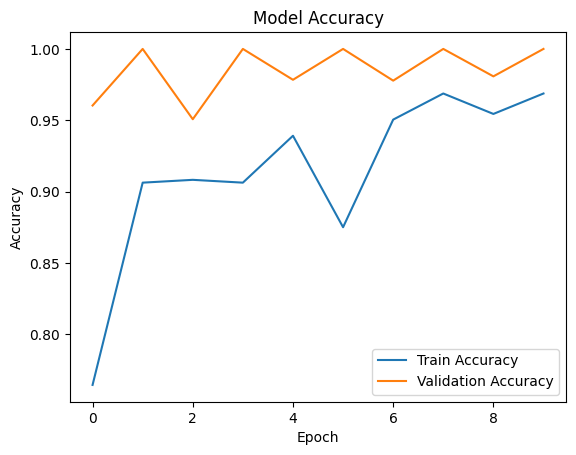

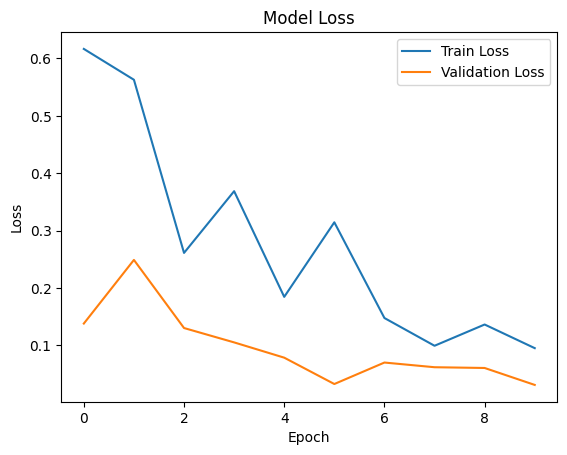

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
img_height, img_width = 224, 224  # Adjust as needed
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training, validation, and test data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Step 2: Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # Adjust to 4 classes (including Not Defined)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=10  # Adjust the number of epochs as needed
)

# Step 4: Evaluate the model
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Save the model
model.save('traffic_sign_classifier_best.h5')


In [1]:
# Imports for detection
import os
import cv2
import numpy as np
import tensorflow as tf
import serial
import serial.tools.list_ports
import threading
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QVBoxLayout
from PyQt5.QtCore import Qt
import sys

# Path to the saved weights after transfer learning
model_weights_path = r"D:\Vortex\ROV\mega project 1\SW-Training-Phase1-2025\S3SW\traffic_sign_classifier_best.h5"

# Load the model
model = tf.keras.models.load_model(model_weights_path)

# Function to automatically detect the Arduino's COM port
def find_arduino_port():
    ports = list(serial.tools.list_ports.comports())
    for port in ports:
        if "USB" in port.description or "Arduino" in port.description or "CH340" in port.description:
            return port.device
    raise Exception("Arduino not found!")

# Set up serial communication with Arduino using the detected port
def setup_arduino_connection():
    arduino_port = find_arduino_port()
    return serial.Serial(port=arduino_port, baudrate=9600, timeout=1)

# Function to send commands to Arduino based on detected signs
def send_command_to_arduino(arduino, command):
    arduino.write(command.encode())  # Send the command as bytes to Arduino

# Function for real-time traffic sign detection and camera display using OpenCV
def detect_signs(arduino, stop_flag):
    # Set up the webcam feed
    cap = cv2.VideoCapture(0)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)  # Set lower resolution for performance
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

    confidence_threshold = 0.6  # Set a confidence threshold (60%)

    while not stop_flag.is_set():
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture video frame.")
            break

        # Preprocess the image for model input
        img = cv2.resize(frame, (224, 224))  # Resize to match the model input shape
        img = img.astype('float32') / 255.0  # Normalize to [0, 1]
        img = np.expand_dims(img, axis=0)  # Add batch dimension

        # Perform detection
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)  # Get the predicted class index
        confidence = np.max(predictions)  # Get the confidence of the prediction

        # Map predicted class index to label
        labels = ['Stop', 'Yield', '30SpeedLimit']
        detected_label = labels[predicted_class]

        # Only act on predictions above the confidence threshold
        if confidence >= confidence_threshold:
            # Display the detected sign and send command to Arduino
            if detected_label == 'Stop':
                print("Stop sign detected!")
                send_command_to_arduino(arduino, '0')  # 'o' for Stop
            elif detected_label == '30SpeedLimit':
                print("30 Speed Limit detected!")
                send_command_to_arduino(arduino, '1')  # 'f' for Forward
            elif detected_label == 'Yield':
                print("Yield sign detected!")
                send_command_to_arduino(arduino, '2')  # 'y' for Yield
        else:
            print("No significant sign detected!")  # Print message if confidence is below threshold

        # Show the frame using OpenCV's imshow (real-time display)
        cv2.imshow('Camera Feed', frame)

        # Check if 'p' is pressed to turn off the buzzer
        if cv2.waitKey(1) & 0xFF == ord('p'):
            print("Turning off the buzzer.")
            send_command_to_arduino(arduino, '3')  # '3' for turning off the buzzer

        # Check if 'q' is pressed to quit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# PyQt5 GUI class for start/stop detection
class DetectionApp(QWidget):
    def __init__(self, arduino):
        super().__init__()
        self.arduino = arduino
        self.setWindowTitle("Detection Control Panel")
        self.setGeometry(300, 300, 300, 150)
        self.stop_flag = threading.Event()  # Flag to stop detection thread
        self.detection_thread = None

        # Create GUI layout
        layout = QVBoxLayout()

        # Start detection button
        self.start_button = QPushButton("Start Detection")
        self.start_button.clicked.connect(self.start_detection)
        layout.addWidget(self.start_button)

        # Stop detection button
        self.stop_button = QPushButton("Stop Detection")
        self.stop_button.clicked.connect(self.stop_detection)
        layout.addWidget(self.stop_button)

        # Exit button
        self.exit_button = QPushButton("Exit")
        self.exit_button.clicked.connect(self.quit_app)
        layout.addWidget(self.exit_button)

        self.setLayout(layout)

    def start_detection(self):
        if self.detection_thread is None or not self.detection_thread.is_alive():
            self.stop_flag.clear()  # Reset the stop flag
            self.detection_thread = threading.Thread(target=detect_signs, args=(self.arduino, self.stop_flag))
            self.detection_thread.start()

    def stop_detection(self):
        if self.detection_thread is not None:
            self.stop_flag.set()  # Set the stop flag to stop the detection thread

    def quit_app(self):
        self.stop_detection()  # Stop detection when exiting
        sys.exit()

# Main entry point of the program
if __name__ == "__main__":
    try:
        arduino = setup_arduino_connection()  # Automatically detect Arduino and set up communication

        app = QApplication(sys.argv)
        detection_app = DetectionApp(arduino)
        detection_app.show()
        sys.exit(app.exec_())
    except Exception as e:
        print(f"Error: {str(e)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
30 Speed Limit detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
30 Speed Limit detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
30 Speed Limit detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
30 Speed Limit detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
30 Speed Limit detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
30 Speed Limit detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
30 Speed Limit detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
30 Speed Limit detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
30 Speed Limit detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
30 Speed Limit detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
30 Speed Limit detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
30 Speed Limit detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
30 Speed Limit detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
30 Speed Limit detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
30 Speed Limit detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
30 Speed Limit de

Exception in thread Thread-5 (detect_signs):
Traceback (most recent call last):
  File "c:\Users\mazen\AppData\Local\Programs\Python\Python312\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "C:\Users\mazen\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\mazen\AppData\Local\Programs\Python\Python312\Lib\threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\mazen\AppData\Local\Temp\ipykernel_43860\4041499758.py", line 63, in detect_signs
IndexError: list index out of range


: 

In [1]:
# Imports for detection
import os
import cv2
import numpy as np
import tensorflow as tf
import serial
import time
import serial.tools.list_ports
import threading
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QVBoxLayout
from PyQt5.QtCore import Qt
import sys

# Path to the saved weights after transfer learning
model_weights_path = r"D:\Vortex\ROV\mega project 1\SW-Training-Phase1-2025\S3SW\traffic_sign_classifier.h5"

# Load the model
model = tf.keras.models.load_model(model_weights_path)

# Function to automatically detect the Arduino's COM port
def find_arduino_port():
    ports = list(serial.tools.list_ports.comports())
    for port in ports:
        if "USB" in port.description or "Arduino" in port.description or "CH340" in port.description:
            return port.device
    raise Exception("Arduino not found!")

# Set up serial communication with Arduino using the detected port
def setup_arduino_connection():
    arduino_port = find_arduino_port()
    return serial.Serial(port=arduino_port, baudrate=115200, timeout=1)

# Function to send commands to Arduino based on detected signs
def send_command_to_arduino(arduino, command):
    arduino.write(command.encode())  # Send the command as bytes to Arduino

# Function for real-time traffic sign detection and camera display using OpenCV
def detect_signs(arduino, stop_flag):
    # Set up the webcam feed
    cap = cv2.VideoCapture(0)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)  # Set lower resolution for performance
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

    while not stop_flag.is_set():
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture video frame.")
            break

        # Preprocess the image for model input
        img = cv2.resize(frame, (224, 224))  # Resize to match the model input shape
        img = img.astype('float32') / 255.0  # Normalize to [0, 1]
        img = np.expand_dims(img, axis=0)  # Add batch dimension

        # Perform detection
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)  # Get the predicted class index

        # Map predicted class index to label
        labels = ['Stop', 'Yield', '30SpeedLimit']
        detected_label = labels[predicted_class]

        # Display the detected sign and send command to Arduino
        if detected_label == 'Stop':
            print("Stop sign detected!")
            send_command_to_arduino(arduino, 's')  # 'S' for Stop
        elif detected_label == '30SpeedLimit':
            print("30 Speed Limit detected!")
            send_command_to_arduino(arduino, 'f')  # 'F' for Forward
        elif detected_label == 'Yield':
            print("Yield sign detected!")
            send_command_to_arduino(arduino, 'y')  # 'Y' for Yield

        # Show the frame using OpenCV's imshow (real-time display)
        cv2.imshow('Camera Feed', frame)

        # Check if 'q' is pressed to quit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# PyQt5 GUI class for start/stop detection
class DetectionApp(QWidget):
    def __init__(self, arduino):
        super().__init__()
        self.arduino = arduino
        self.setWindowTitle("Detection Control Panel")
        self.setGeometry(300, 300, 300, 150)
        self.stop_flag = threading.Event()  # Flag to stop detection thread
        self.detection_thread = None

        # Create GUI layout
        layout = QVBoxLayout()

        # Start detection button
        self.start_button = QPushButton("Start Detection")
        self.start_button.clicked.connect(self.start_detection)
        layout.addWidget(self.start_button)

        # Stop detection button
        self.stop_button = QPushButton("Stop Detection")
        self.stop_button.clicked.connect(self.stop_detection)
        layout.addWidget(self.stop_button)

        # Exit button
        self.exit_button = QPushButton("Exit")
        self.exit_button.clicked.connect(self.quit_app)
        layout.addWidget(self.exit_button)

        self.setLayout(layout)

    def start_detection(self):
        if self.detection_thread is None or not self.detection_thread.is_alive():
            self.stop_flag.clear()  # Reset the stop flag
            self.detection_thread = threading.Thread(target=detect_signs, args=(self.arduino, self.stop_flag))
            self.detection_thread.start()

    def stop_detection(self):
        if self.detection_thread is not None:
            self.stop_flag.set()  # Set the stop flag to stop the detection thread

    def quit_app(self):
        self.stop_detection()  # Stop detection when exiting
        sys.exit()

# Main entry point of the program
if __name__ == "__main__":
    try:
        arduino = setup_arduino_connection()  # Automatically detect Arduino and set up communication

        app = QApplication(sys.argv)
        detection_app = DetectionApp(arduino)
        detection_app.show()
        sys.exit(app.exec_())
    except Exception as e:
        print(f"Error: {str(e)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Stop sign detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Stop sign detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Stop sign detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Stop sign detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Stop sign detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Stop sign detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Stop sign detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Stop sign detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Stop sign detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Stop sign detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Stop sign detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Stop sign detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Stop sign detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Exception in thread Thread-5 (detect_signs):
Traceback (most recent call last):
  File "c:\Users\mazen\AppData\Local\Programs\Python\Python312\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "C:\Users\mazen\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\mazen\AppData\Local\Programs\Python\Python312\Lib\threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\mazen\AppData\Local\Temp\ipykernel_6952\4015318126.py", line 61, in detect_signs
IndexError: list index out of range


: 